In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [2]:
file_path = "Income_data\combined.csv"

income_df = pd.read_csv(file_path)

In [3]:
#Only grab relevant columns
income_df1 = income_df[['Year','State or county name','Estimate of median household income']]
income_df1

,Year,State or county name,Estimate of median household income
0,2010,Minnesota,55422
1,2010,Aitkin County,38646
2,2010,Anoka County,65732
3,2010,Becker County,43970
4,2010,Beltrami County,40308
...,...,...,...
523,2015,Watonwan County,48044
524,2015,Wilkin County,56583
525,2015,Winona County,54367
526,2015,Wright County,76407


In [4]:
#filter 7 metro counties in MN
county = ['Anoka County','Carver County', 'Hennepin County', 'Dakota County','Ramsey County','Scott County','Washington County']
income_df1 = income_df1.loc[income_df1['State or county name'].isin(county)]
income_df1 = income_df1.sort_values(by = 'State or county name', ascending = True)
income_df1.head()

,Year,State or county name,Estimate of median household income
2,2010,Anoka County,65732
354,2014,Anoka County,70868
266,2013,Anoka County,70619
178,2012,Anoka County,67811
90,2011,Anoka County,63799


In [5]:
#take average of median household income in 2010-2015 by County
income_df1 = round(income_df1.groupby('State or county name').mean(),2)
income_df1 = income_df1.drop(['Year'], axis =1)
income_df1 = income_df1.reset_index()
income_df1_renamed = income_df1.rename(columns = {'Estimate of median household income':'AVG Median Household Income (2010-2015)',
                                                 'State or county name':'County'})

#create a new column named 'Converted_Income' by dividing by 1000
income_df1_renamed['County'] = income_df1_renamed['County'].str.replace("County", "", case = False)
income_df1_renamed['Converted_Income (thousands)'] = income_df1_renamed['AVG Median Household Income (2010-2015)']/1000
income_df1_renamed = income_df1_renamed.drop(columns=['AVG Median Household Income (2010-2015)'],axis=1)
income_df1_renamed.to_csv('income_final.csv')
income_df1_renamed

,County,Converted_Income (thousands)
0,Anoka,68.68417
1,Carver,86.90483
2,Dakota,73.16733
3,Hennepin,63.38100
4,Ramsey,54.05200
5,Scott,86.04733
6,Washington,81.46683


In [6]:
#read lfe expectancy csv
life_path = 'life_data\life.csv'
life_df = pd.read_csv(life_path)
life_df = life_df.drop(['Unnamed: 0'], axis =1)

#drop text 'County, MN' in County column
life_df['County'] = life_df['County'].str.replace("County, MN", "", case = False) 
life_df

,County,Life Expectancy
0,Anoka,80.140260
1,Carver,82.370588
2,Dakota,80.683333
3,Hennepin,80.320438
4,Ramsey,79.533846
5,Scott,80.809524
6,Washington,81.847917


In [7]:
#merge the two data frames on County
merged_df = pd.merge(income_df1_renamed,life_df, on ='County')
merged_df

,County,Converted_Income (thousands),Life Expectancy
0,Anoka,68.68417,80.140260
1,Carver,86.90483,82.370588
2,Dakota,73.16733,80.683333
3,Hennepin,63.38100,80.320438
4,Ramsey,54.05200,79.533846
5,Scott,86.04733,80.809524
6,Washington,81.46683,81.847917


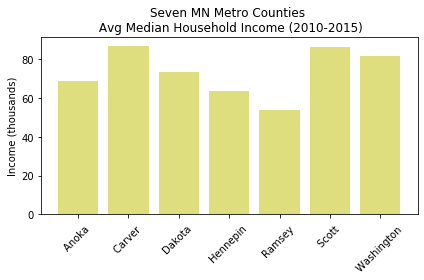

<Figure size 432x288 with 0 Axes>

In [8]:
#create bar chart
x_axis = np.arange(len(merged_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, merged_df['Converted_Income (thousands)'], color ='y',alpha=0.5, align="center")
plt.xticks(tick_locations, merged_df['County'],rotation ='45')
plt.ylabel('Income (thousands)')
plt.title('Seven MN Metro Counties \n Avg Median Household Income (2010-2015)')

#get current figure with plt.gcf()
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('Income_barchart.png',dpi = 300)

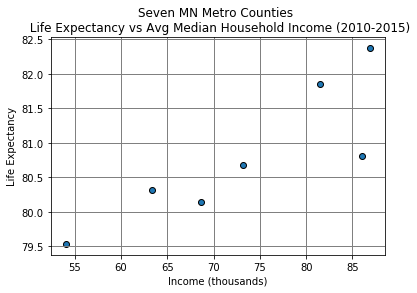

In [9]:
plt.scatter(merged_df['Converted_Income (thousands)'],merged_df['Life Expectancy'], edgecolors='black')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel('Income (thousands)')
plt.ylabel('Life Expectancy')
plt.title('Seven MN Metro Counties \n Life Expectancy vs Avg Median Household Income (2010-2015)')
plt.show()

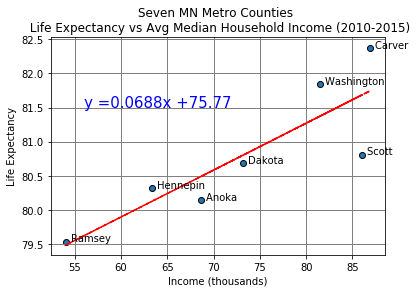

In [10]:
#perform linear regression
n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(merged_df['Converted_Income (thousands)'],merged_df['Life Expectancy'])

#regression equation line
n_fit = n_slope * merged_df['Converted_Income (thousands)'] + n_int

#line equation
line_eq = 'y =' + str(round(n_slope,4)) + "x +" + str(round(n_int,2))

#plot labels
x = merged_df['Converted_Income (thousands)']
y = merged_df['Life Expectancy']
z = merged_df['County']


fig, ax = plt.subplots()
plt.scatter(merged_df['Converted_Income (thousands)'],merged_df['Life Expectancy'], edgecolors="black")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(merged_df['Converted_Income (thousands)'],n_fit,"--",color="red")
plt.annotate(line_eq,xy=(56,81.5),fontsize=15,color='blue')


#for loop to print labels on the plots
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), textcoords="offset points", # how to position the text
                 xytext=(5,0),ha='left')

plt.xlabel("Income (thousands)")
plt.ylabel("Life Expectancy")
plt.title("Seven MN Metro Counties \n Life Expectancy vs Avg Median Household Income (2010-2015)")
plt.show()

fig.savefig('LifeExpectancy_vs_Income.png',dpi=300)


In [11]:
print(f'The r-value is {round(n_r,4)}.')
print(f'The p-value is {round(n_p,4)}.')
print(f'The standard error is {round(n_std_err,4)}.')

The r-value is 0.8558.
The p-value is 0.014.
The standard error is 0.0186.


In [12]:
coef = stats.pearsonr(merged_df['Converted_Income (thousands)'], merged_df['Life Expectancy'])
print(f'The correlation coefficient is {coef[0]}.')

The correlation coefficient is 0.8558207182130088.


## Summary of Findings

* Ramsey and Hennepin county has lower average of median household from 2010-2015 (estimated 54,000 and 63,000 respectively). 
* Scott and Carver county has the higher average of median household from 2010-2015 (estimated 86,000 and 87,000 respectively).
* There is a strong positive relationship (correlation coefficient: 0.8558) between average median household income and life expectancy.
* With every additional 1,000 dollars in average median household income, this would increase the average life expectancy by 0.0688.  